In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
from tensorflow import keras

# Erik Alberto López Alvarado

In [44]:
fashion_mnist = keras.datasets.fashion_mnist

In [59]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
X_test.shape

(10000, 28, 28)

# Entrena y evalua un modelo de aprendizaje de máquina para predecir la clase a la que pertenece cada imagen.

# Usaremos una Red Neuronal Artifificial (ANN)

In [48]:
# crear objetos (estimadores - transformadores) Estos objetos se usarán para hacer reducci
scaler = StandardScaler()

In [67]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [68]:
# escalar los datos de entrenamiento
X_train_std = scaler.fit_transform(X_train)

# tambien los de testing
X_test_std = scaler.transform(X_test)

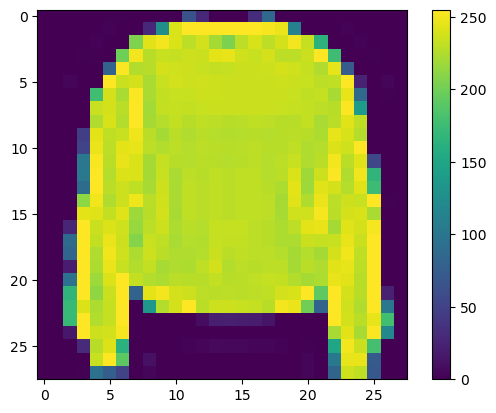

In [62]:
#Ploteamos la primer imagen
plt.figure()
plt.imshow(X_train[7]) # Se visualizará la primer imagen
plt.colorbar()
plt.grid(False)
plt.show()

In [63]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

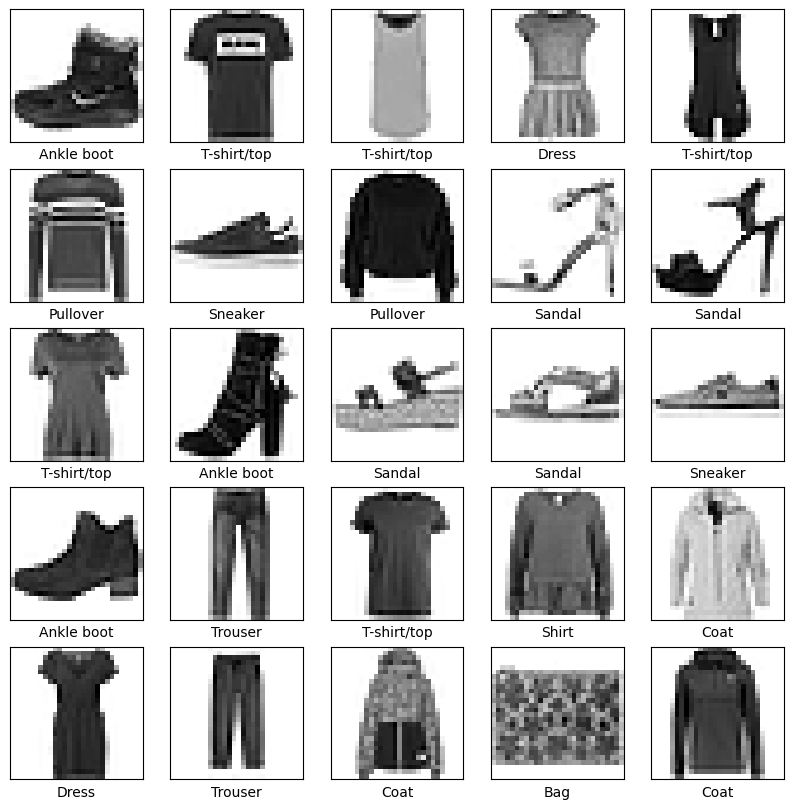

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [69]:
ann = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=[784], activation='relu', kernel_regularizer='l2'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300, activation='relu', kernel_regularizer='l2'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation='relu', kernel_regularizer='l2'),
   keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [70]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               60200     
                                                      

In [71]:
ann.compile(optimizer='nadam', #nadam es más rápido que gradient descent, 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [72]:
%%time
history = ann.fit(X_train_std , y_train, epochs=200, validation_split=0.2) #Los datos tienen que estar estandarizados.
#Una partición de validación por cada ciclo de entrenamiento. Se toman en realidad 300 conjuntos de val diferentes (en este caso)
#Aleatorios en caasa paso del entrenamiento. 

Epoch 1/200
1500/1500 [==============================] - 14s 7ms/step - loss: 2.9592 - accuracy: 0.7363 - val_loss: 0.9481 - val_accuracy: 0.8157
Epoch 2/200
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1178 - accuracy: 0.7697 - val_loss: 1.0125 - val_accuracy: 0.8131
Epoch 3/200
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1437 - accuracy: 0.7678 - val_loss: 1.0139 - val_accuracy: 0.8060
Epoch 4/200
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1450 - accuracy: 0.7699 - val_loss: 0.9914 - val_accuracy: 0.8154
Epoch 5/200
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1462 - accuracy: 0.7698 - val_loss: 0.9857 - val_accuracy: 0.8151
Epoch 6/200
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1398 - accuracy: 0.7705 - val_loss: 1.1290 - val_accuracy: 0.7808
Epoch 7/200
1500/1500 [==============================] - 10s 7ms/step - loss: 1.1267 - accuracy: 0.7724 - val_loss: 0.9496 -

Epoch 57/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9692 - accuracy: 0.7760 - val_loss: 0.7951 - val_accuracy: 0.8297
Epoch 58/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9675 - accuracy: 0.7748 - val_loss: 0.8359 - val_accuracy: 0.8123
Epoch 59/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9666 - accuracy: 0.7771 - val_loss: 0.7894 - val_accuracy: 0.8266
Epoch 60/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9596 - accuracy: 0.7778 - val_loss: 0.8296 - val_accuracy: 0.8146
Epoch 61/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9632 - accuracy: 0.7759 - val_loss: 0.8156 - val_accuracy: 0.8130
Epoch 62/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9692 - accuracy: 0.7737 - val_loss: 0.7931 - val_accuracy: 0.8294
Epoch 63/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9733 - accuracy: 0.7760 - val_loss: 0

1500/1500 [==============================] - 10s 7ms/step - loss: 0.9302 - accuracy: 0.7733 - val_loss: 0.7548 - val_accuracy: 0.8314
Epoch 168/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9304 - accuracy: 0.7752 - val_loss: 0.7516 - val_accuracy: 0.8286
Epoch 169/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9303 - accuracy: 0.7735 - val_loss: 0.8043 - val_accuracy: 0.8083
Epoch 170/200
1500/1500 [==============================] - 11s 7ms/step - loss: 0.9340 - accuracy: 0.7746 - val_loss: 0.7545 - val_accuracy: 0.8235
Epoch 171/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9307 - accuracy: 0.7749 - val_loss: 0.7645 - val_accuracy: 0.8274
Epoch 172/200
1500/1500 [==============================] - 11s 8ms/step - loss: 0.9279 - accuracy: 0.7724 - val_loss: 0.7513 - val_accuracy: 0.8253
Epoch 173/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9309 - accuracy: 0.7733 - val_loss: 0.7637 -

<Axes: >

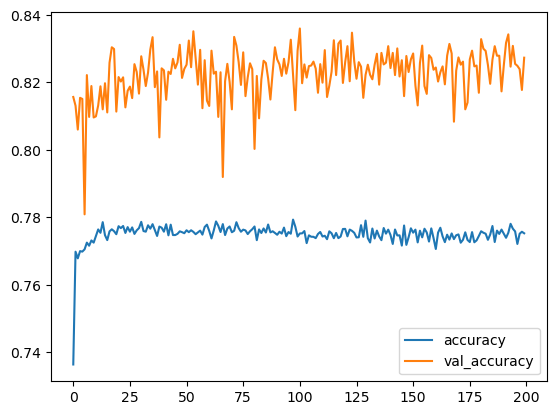

In [73]:
histdf = pd.DataFrame(history.history)
histdf[['accuracy', 'val_accuracy']].plot()

<Axes: >

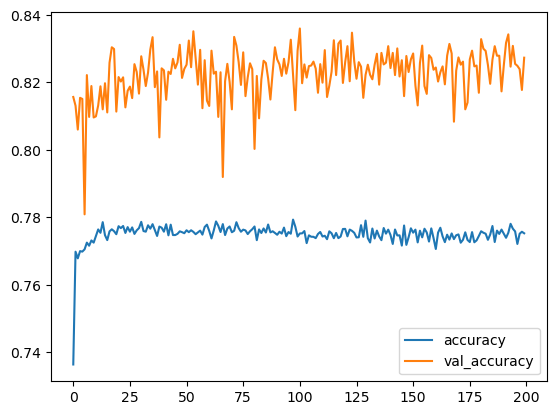

In [74]:
histdf[['accuracy', 'val_accuracy']].plot()
#plt.ylim(0.9, 1.01)